In [5]:
import glob
import os
import numpy as np
import sys

current_dir = "/mydrive//yolov4_tiny_dog_cat//darknet//data//ts/"
split_pct = 10;
file_train = open("darknet/data/train.txt", "w")  
file_val = open("darknet/data/test.txt", "w")  
counter = 1  
index_test = round(100 / split_pct)  
for pathAndFilename in glob.iglob(os.path.join(current_dir, "*.jpg")):  
        title, ext = os.path.splitext(os.path.basename(pathAndFilename))
        if counter == index_test:
                counter = 1
                file_val.write(current_dir + "/" + title + '.jpg' + "\n")
        else:
                file_train.write(current_dir + "/" + title + '.jpg' + "\n")
                counter = counter + 1
file_train.close()
file_val.close()


In [6]:
# Inside your data folder, you will train.txt and test.txt file now.
# Now create 2 files in data folder - obj.data and obj.names

FileNotFoundError: [Errno 2] No such file or directory: 'darknet/data\\dog.txt'

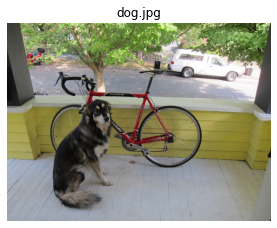

In [7]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import glob
import os

def read_label(image_path):
  file_name = image_path.replace('.jpg', '.txt')
  with open(file_name, 'rt') as file:
    print(os.path.basename(file_name) + ': \n' + file.read())

image_path = glob.glob("darknet/data/*.jpg")
fig = plt.figure(figsize=(12,8))
cols = 2
rows = 2
grid = gridspec.GridSpec(nrows=rows, ncols=cols, figure=fig)
for i in range(cols*rows):
  fig.add_subplot(grid[i])
  image=plt.imread(image_path[i])
  plt.title(os.path.basename(image_path[i]))
  plt.axis(False)
  plt.imshow(image)
  read_label(image_path[i])

plt.savefig("darknet\data\test.jpg", dpi=300)

In [8]:
pwd

'd:\\project\\Object-Detection-Using-yolov4-tiny-main'

In [9]:
# Here we use transfer learning. Instead of training a model from scratch, we use pre-trained YOLOv4 weights
# Run the following command to download the YOLOv4 pre-trained weights file.
%cd darknet/data/

#!wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v4_pre/yolov4-tiny.weights

d:\project\Object-Detection-Using-yolov4-tiny-main\darknet\data


In [10]:
%cd ..

d:\project\Object-Detection-Using-yolov4-tiny-main\darknet


In [11]:
#%cd darknet/
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile




'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.
'sed' is not recognized as an internal or external command,
operable program or batch file.


In [12]:
#!make


In [13]:
!chmod +x ./darknet

'chmod' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
!./darknet detector train data/obj.data cfg/yolov4-tiny-custom.cfg data/yolov4-tiny.weights -dont_show 

'.' is not recognized as an internal or external command,
operable program or batch file.


In [15]:
#can check the performance of all the trained weights by looking at the chart.png file. However, the chart.png file only shows results if the training does not get interrupted i.e. if you do not get disconnected or lose your session. If you restart training from a saved point, this will not work.
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()
imShow('chart.png')

AttributeError: 'NoneType' object has no attribute 'shape'

In [16]:
img_path = "data/test.jpg"
!./darknet detector test data/obj.data cfg/yolov4-tiny-custom_test.cfg data/yolov4-tiny-custom_3000.weights {img_path} -dont-show

'.' is not recognized as an internal or external command,
operable program or batch file.


FileNotFoundError: [Errno 2] No such file or directory: './predictions.jpg'

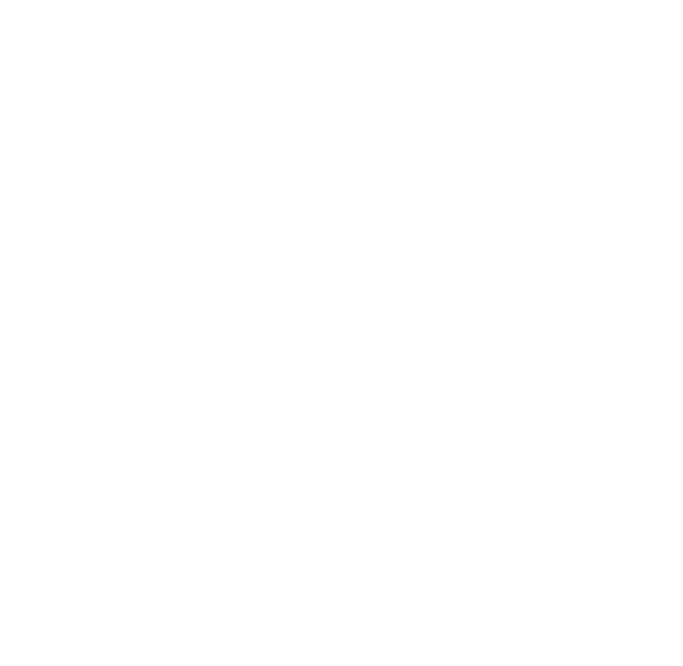

In [17]:

import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(12,12))
plt.axis(False)
processed_image = plt.imread("./predictions.jpg")
plt.imshow(processed_image)